In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
frequency = 440  # Frequency of the wave, A4 note in Hz
sampling_rate = 44100  # CD-quality sampling rate in Hz
duration = 0.01  # seconds

In [67]:
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)  # Time axis

# Generate the analog signal (sine wave)
analog_signal = np.sin(2 * np.pi * frequency * t)

# Sampling
# Since we're already using a discrete time array `t`, our "sampling" is implicit in the generation.

# Quantization
quant_levels = 2**2  # standard: 16-bit quantization
quantized_signal = np.round((analog_signal + 1) * (quant_levels / 2)) / (quant_levels / 2) - 1

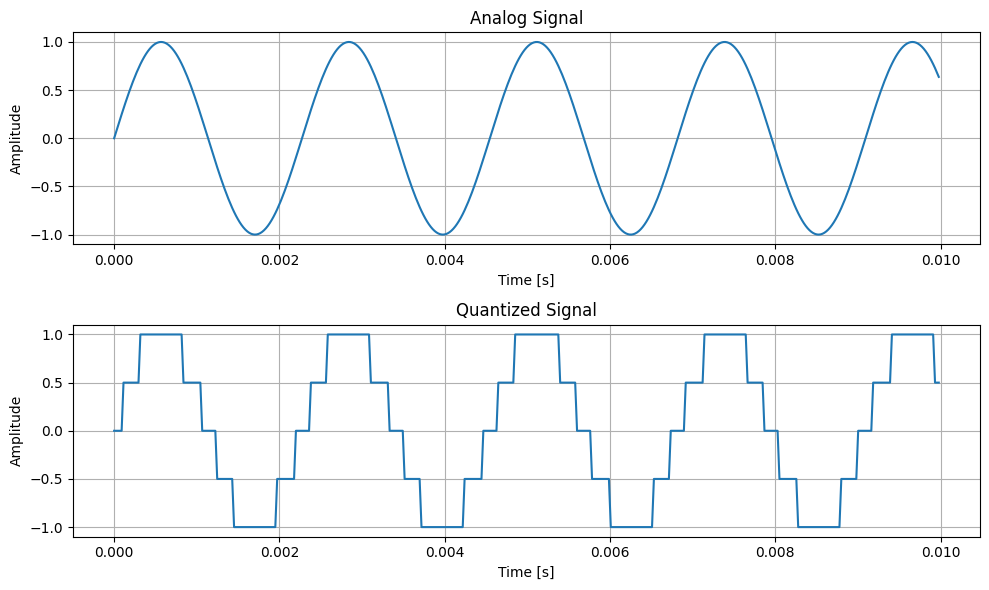

In [68]:

# Plotting
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, analog_signal, label='Analog Signal')
plt.title('Analog Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, quantized_signal, '-', markersize=2)  # Changed to use plt.plot with 'ro' for red dots
plt.title('Quantized Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


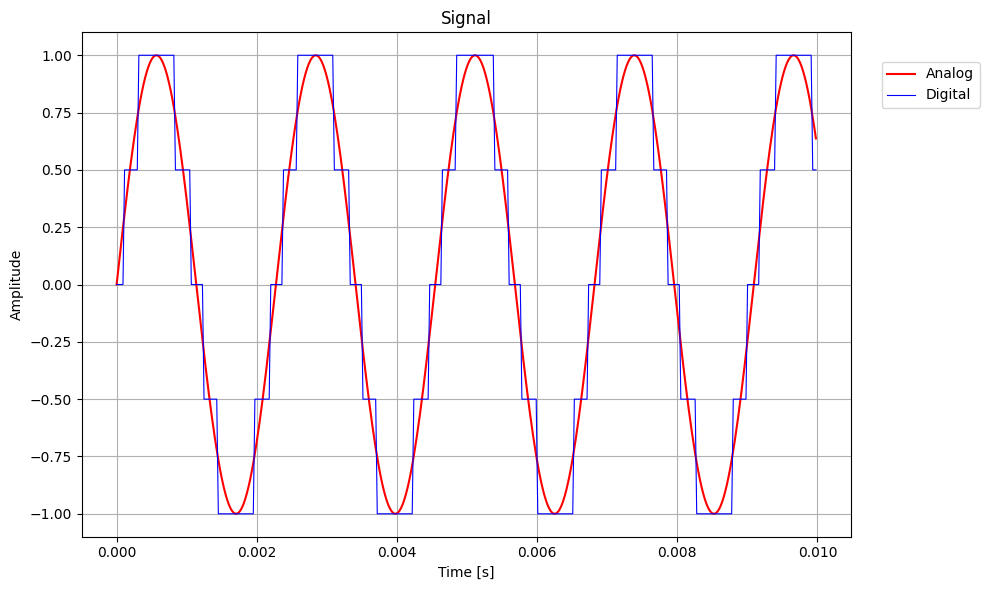

In [80]:

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, analog_signal, label='Analog', c='red')
plt.plot(t, quantized_signal, c='blue', linewidth=.8, label='Digital')  # Changed to use plt.plot with 'ro' for red dots

plt.title('Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
# plt.legend(loc="upper right")
plt.legend(loc=(1.04, .85))

plt.grid(True)


plt.tight_layout()
plt.show()


In [2]:
import numpy as np




Encoded Values: [0 2 4 7]


In [21]:
def encode_to_binary(quantized_values, n_bits, rep_type='string'):
    # Assume quantized_values are scaled integers from the quantization process
    # Convert each integer to its binary string representation, padded to n_bits
    binary_encoded_values = [(bin(value)[2:]).zfill(n_bits) for value in quantized_values]
    if rep_type=='array':
        binary_encoded_values = [[int(b) for b in binary_string] for binary_string in binary_encoded_values]
    return binary_encoded_values

# Example usage
quantized_values = np.array([0, 2, 4, 7])  # Example quantized values
n_bits = 3  # Using 3 bits for quantization

binary_encoded_values = encode_to_binary(quantized_values, n_bits, rep_type='string')
print("Binary Encoded Values:", binary_encoded_values)

binary_encoded_values = encode_to_binary(quantized_values, n_bits, rep_type='array')
print("Binary Encoded Values Array:", binary_encoded_values)

Binary Encoded Values: ['000', '010', '100', '111']
Binary Encoded Values Array: [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]]


In [29]:
import numpy as np

def int_to_binary_vector(numbers, n_bits):
    # Convert the list of numbers to a NumPy array
    num_array = np.array(numbers)
    
    # Prepare the bit mask to extract each bit position
    # Generate an array [2**(n_bits-1), 2**(n_bits-2), ..., 1]
    bit_mask = 2 ** np.arange(n_bits - 1, -1, -1)
    
    # Use broadcasting to apply the bit masks and right shift
    binary_matrix = (num_array[:, None] & bit_mask) > 0
    
    # Convert boolean matrix to int for final output
    return binary_matrix.astype(int)

# Example usage
numbers = [0, 2, 4, 7]
n_bits = 3  # Number of bits to represent the highest number

binary_vectors = int_to_binary_vector(numbers, n_bits)
print("Binary Vectors:\n", binary_vectors)


Binary Vectors:
 [[0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 1]]


In [37]:
bit_mask = 2 ** np.arange(n_bits - 1, -1, -1)
print(np.array(numbers)[:, None])
print(bit_mask)
np.array(numbers)[:, None] & bit_mask

[[0]
 [2]
 [4]
 [7]]
[4 2 1]


array([[0, 0, 0],
       [0, 2, 0],
       [4, 0, 0],
       [4, 2, 1]], dtype=int32)